In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# PH01-00

In [57]:
#read the data from the excel file
df = pd.read_excel('ph0303(2).xlsx')
df_binary = df[['Pressure', 'Flowrate','Pressure_ground_truth']]
# df_binary = df[['Pressure', 'Flowrate']]

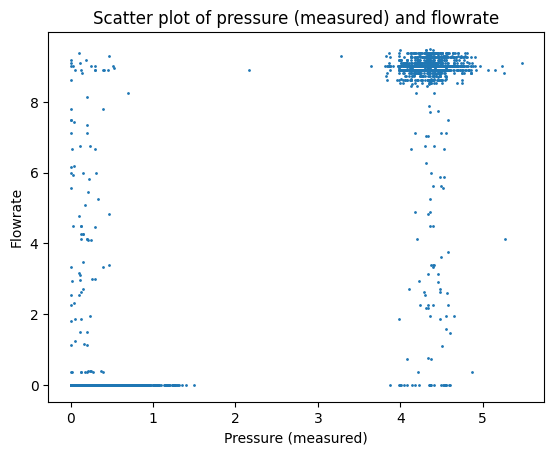

In [58]:
Pressure = np.array(df_binary['Pressure']).reshape(-1, 1)
Flowrate = np.array(df_binary['Flowrate']).reshape(-1, 1)
Pressure_gt = np.array(df_binary['Pressure_ground_truth']).reshape(-1, 1)
# plot scatter plot of pressure and flowrate using matplotlib
plt.figure()
plt.scatter(Pressure, Flowrate,s=1)
plt.xlabel('Pressure (measured)')
plt.ylabel('Flowrate')
plt.title('Scatter plot of pressure (measured) and flowrate')
plt.show()

# plot scatter plot of pressure and pressure ground truth
plt.figure()
plt.scatter(Pressure, Pressure_gt,s=1)
plt.xlabel('Pressure (measured)')
plt.ylabel('Pressure (ground truth)')
plt.title('Scatter plot of pressure (measured) and pressure (ground truth)')

# plot scatter plot of flowrate and pressure ground truth
plt.figure()
plt.scatter(Pressure_gt,Flowrate,s=1)
plt.ylabel('Flowrate')
plt.xlabel('Pressure (ground truth)')

# plot histogram of pressure and flowrate and pressure ground truth
plt.figure()
plt.hist(Pressure, bins=20)
plt.xlabel('Pressure measured')
plt.ylabel('Frequency')
plt.title('Histogram of pressure')
plt.show()

plt.figure()
plt.hist(Flowrate, bins=20)
plt.xlabel('Flowrate')
plt.ylabel('Frequency')
plt.title('Histogram of flowrate')
plt.show()

plt.figure()
plt.hist(Pressure_gt, bins=20)
plt.xlabel('Pressure ground truth')
plt.ylabel('Frequency')
plt.title('Histogram of pressure ground truth')
plt.show()

The value of the silhouette coefﬁcient is between [-1, 1]. A score of 1 denotes the best, meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters.</br>
The Calinski-Harabasz index also known as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score , the better the performances.</br>
The Davies-Bouldin index is the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. The lower the score, the better the clustering.</br>

In [50]:
# # Try to find the best cluster number
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# from sklearn.metrics import calinski_harabasz_score
# from sklearn.metrics import davies_bouldin_score

# # find the best cluster number

# for i in range(2, 10):
#     kmeans = KMeans(n_clusters=i, random_state=0,n_init=10).fit(Pressure)
#     labels = kmeans.labels_
#     print('Silhouette Coefficient for cluster number', i, 'is', silhouette_score(Pressure, labels))
#     print('Calinski Harabasz Score for cluster number', i, 'is', calinski_harabasz_score(Pressure, labels))
#     print('Davies Bouldin Score for cluster number', i, 'is', davies_bouldin_score(Pressure, labels))

# # for Flowrate
# for i in range(2, 10):
#     kmeans = KMeans(n_clusters=i, random_state=0,n_init=10).fit(Flowrate)
#     labels = kmeans.labels_
#     print('Silhouette Coefficient for cluster number', i, 'is', silhouette_score(Flowrate, labels))
#     print('Calinski Harabasz Score for cluster number', i, 'is', calinski_harabasz_score(Flowrate, labels))
#     print('Davies Bouldin Score for cluster number', i, 'is', davies_bouldin_score(Flowrate, labels))


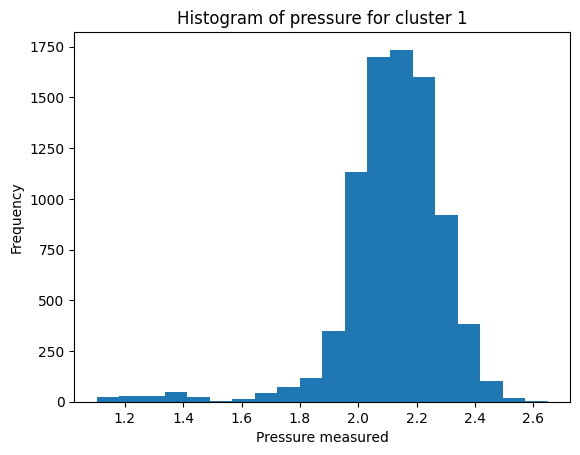

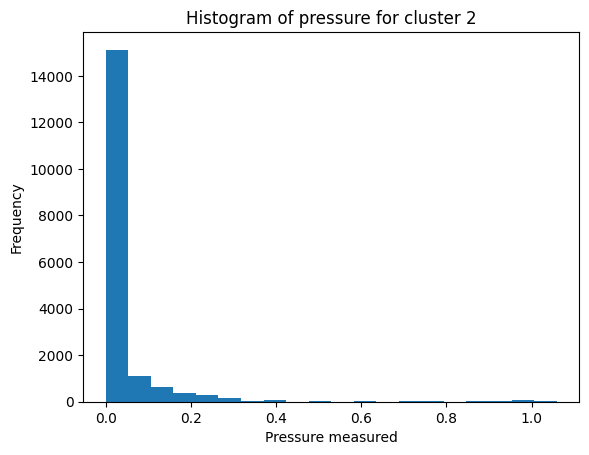

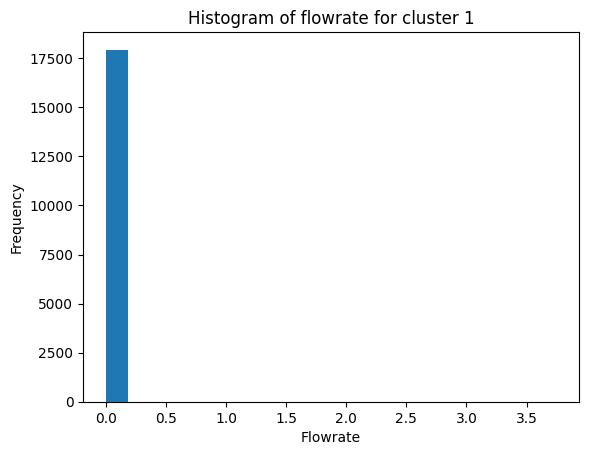

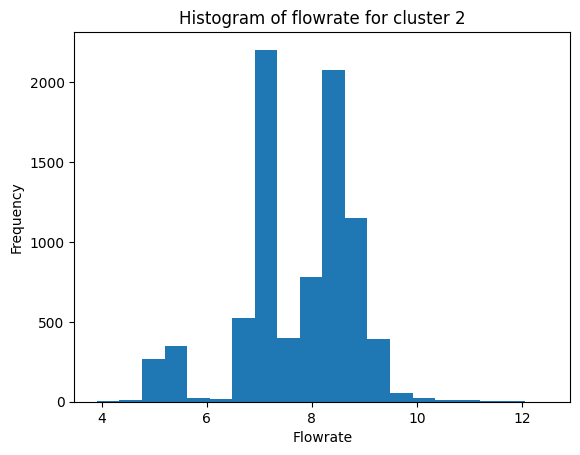

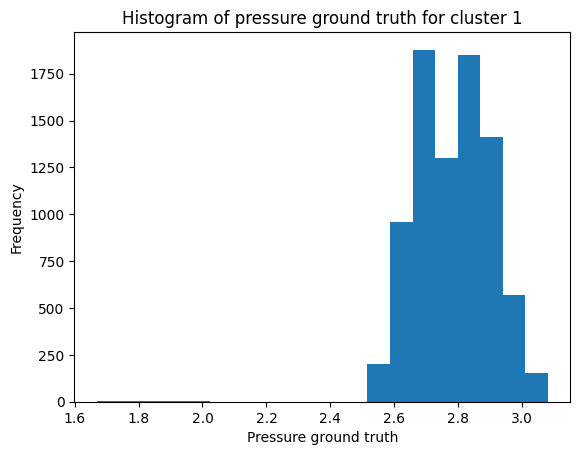

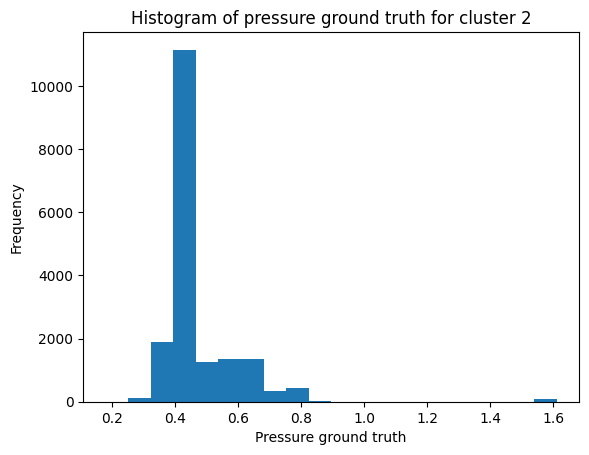

In [35]:
# since the best cluster number is 2, we use 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0,n_init=10).fit(Pressure)
labels = kmeans.labels_
# plot histograms with clusters
plt.figure()
plt.hist(Pressure[labels == 0], bins=20)
plt.xlabel('Pressure measured')
plt.ylabel('Frequency')
plt.title('Histogram of pressure for cluster 1')
plt.show()

plt.figure()
plt.hist(Pressure[labels == 1], bins=20)
plt.xlabel('Pressure measured')
plt.ylabel('Frequency')
plt.title('Histogram of pressure for cluster 2')
plt.show()

# for Flowrate
kmeans = KMeans(n_clusters=2, random_state=0,n_init=10).fit(Flowrate)
labels = kmeans.labels_
plt.figure()
plt.hist(Flowrate[labels == 0], bins=20)
plt.xlabel('Flowrate')
plt.ylabel('Frequency')
plt.title('Histogram of flowrate for cluster 1')
plt.show()

plt.figure()
plt.hist(Flowrate[labels == 1], bins=20)
plt.xlabel('Flowrate')
plt.ylabel('Frequency')
plt.title('Histogram of flowrate for cluster 2')
plt.show()

# for Pressure ground truth
kmeans = KMeans(n_clusters=2, random_state=0,n_init=10).fit(Pressure_gt)
labels = kmeans.labels_
plt.figure()
plt.hist(Pressure_gt[labels == 0], bins=20)
plt.xlabel('Pressure ground truth')
plt.ylabel('Frequency')
plt.title('Histogram of pressure ground truth for cluster 1')
plt.show()

plt.figure()
plt.hist(Pressure_gt[labels == 1], bins=20)
plt.xlabel('Pressure ground truth')
plt.ylabel('Frequency')
plt.title('Histogram of pressure ground truth for cluster 2')
plt.show()

In [59]:
# Using Kmeans, removing the outliers lying outside the 3 standard deviations from the median of each cluster. First for pressure clusters and then for flowrate clusters
df_binary = df[['Pressure', 'Flowrate', 'Pressure_ground_truth']]
# Pressure
# since the best cluster number is 2, we use 2 clusters
kmeans1 = KMeans(n_clusters=2, random_state=0,n_init=10).fit(Pressure)
labels = kmeans1.labels_
cluster1 = []
cluster2 = []
for i in range(len(labels)):
    if labels[i] == 0:
        cluster1.append(Pressure[i])
    else:
        cluster2.append(Pressure[i])

cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)

cluster1_median = np.median(cluster1)
cluster1_std = np.std(cluster1)
cluster2_median = np.median(cluster2)
cluster2_std = np.std(cluster2)
print('cluster1 median is', cluster1_median)
print('cluster1 standard deviation is', cluster1_std)
print('cluster2 median is', cluster2_median)
print('cluster2 standard deviation is', cluster2_std)

# remove outliers
for i in range(len(labels)):
    if labels[i] == 0:
        if Pressure[i] < cluster1_median - 3 * cluster1_std or Pressure[i] > cluster1_median + 3 * cluster1_std:
            Pressure[i] = cluster1_median
    else:
        if Pressure[i] < cluster2_median - 3 * cluster2_std or Pressure[i] > cluster2_median + 3 * cluster2_std:
            Pressure[i] = cluster2_median

# Flowrate
# since the best cluster number is 2, we use 2 clusters
kmeans2 = KMeans(n_clusters=2, random_state=0,n_init=10).fit(Flowrate)
labels = kmeans2.labels_
cluster1 = []
cluster2 = []
for i in range(len(labels)):
    if labels[i] == 0:
        cluster1.append(Flowrate[i])
    else:
        cluster2.append(Flowrate[i])

cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)

cluster1_median = np.median(cluster1)
cluster1_std = np.std(cluster1)
cluster2_median = np.median(cluster2)
cluster2_std = np.std(cluster2)
print('cluster1 median is', cluster1_median)
print('cluster1 standard deviation is', cluster1_std)
print('cluster2 median is', cluster2_median)
print('cluster2 standard deviation is', cluster2_std)

# remove outliers
for i in range(len(labels)):
    if labels[i] == 0:
        if Flowrate[i] < cluster1_median - 3 * cluster1_std or Flowrate[i] > cluster1_median + 3 * cluster1_std:
            Flowrate[i] = cluster1_median
    else:
        if Flowrate[i] < cluster2_median - 3 * cluster2_std or Flowrate[i] > cluster2_median + 3 * cluster2_std:
            Flowrate[i] = cluster2_median

# Pressure_ground_truth
# since the best cluster number is 2, we use 2 clusters
kmeans3 = KMeans(n_clusters=2, random_state=0,n_init=10).fit(Pressure_gt)
labels = kmeans3.labels_
cluster1 = []
cluster2 = []
for i in range(len(labels)):
    if labels[i] == 0:
        cluster1.append(Pressure_gt[i])
    else:
        cluster2.append(Pressure_gt[i])

cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)

cluster1_median = np.median(cluster1)
cluster1_std = np.std(cluster1)
cluster2_median = np.median(cluster2)
cluster2_std = np.std(cluster2)

# remove outliers
for i in range(len(labels)):
    if labels[i] == 0:
        if Pressure_gt[i] < cluster1_median - 3 * cluster1_std or Pressure_gt[i] > cluster1_median + 3 * cluster1_std:
            Pressure_gt[i] = cluster1_median
    else:
        if Pressure_gt[i] < cluster2_median - 3 * cluster2_std or Pressure_gt[i] > cluster2_median + 3 * cluster2_std:
            Pressure_gt[i] = cluster2_median

# update the dataframe
df_binary['Pressure'] = Pressure
df_binary['Flowrate'] = Flowrate
df_binary['Pressure_ground_truth'] = Pressure_gt

# plot histograms with new clusters
# for Pressure
kmeans = KMeans(n_clusters=2, random_state=0,n_init=10).fit(Pressure)
labels = kmeans.labels_
plt.figure()
plt.hist(Pressure[labels == 0], bins=20)
plt.xlabel('Pressure')
plt.ylabel('Frequency')
plt.title('Histogram of pressure for cluster 1')
plt.show()

plt.figure()
plt.hist(Pressure[labels == 1], bins=20)
plt.xlabel('Pressure')
plt.ylabel('Frequency')
plt.title('Histogram of pressure for cluster 2')
plt.show()

# for Flowrate
kmeans = KMeans(n_clusters=2, random_state=0,n_init=10).fit(Flowrate)
labels = kmeans.labels_
plt.figure()
plt.hist(Flowrate[labels == 0], bins=20)
plt.xlabel('Flowrate')
plt.ylabel('Frequency')
plt.title('Histogram of flowrate for cluster 1')
plt.show()

plt.figure()
plt.hist(Flowrate[labels == 1], bins=20)
plt.xlabel('Flowrate')
plt.ylabel('Frequency')
plt.title('Histogram of flowrate for cluster 2')
plt.show()

# for Pressure_ground_truth
kmeans = KMeans(n_clusters=2, random_state=0,n_init=10).fit(Pressure_gt)
labels = kmeans.labels_
plt.figure()
plt.hist(Pressure_gt[labels == 0], bins=20)
plt.xlabel('Pressure_ground_truth')
plt.ylabel('Frequency')
plt.title('Histogram of pressure ground truth for cluster 1')
plt.show()

plt.figure()
plt.hist(Pressure_gt[labels == 1], bins=20)
plt.xlabel('Pressure_ground_truth')
plt.ylabel('Frequency')
plt.title('Histogram of pressure ground truth for cluster 2')
plt.show()

cluster1 median is 0.16673333333333407
cluster1 standard deviation is 0.15167476459124557
cluster2 median is 4.361553333333335
cluster2 standard deviation is 0.18754353766749696
cluster1 median is 0.0
cluster1 standard deviation is 0.1514939156048706
cluster2 median is 8.999999987045632
cluster2 standard deviation is 0.5474816620037662


C:\Users\gandh\AppData\Local\Temp\ipykernel_6400\2582491553.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['Pressure'] = Pressure
C:\Users\gandh\AppData\Local\Temp\ipykernel_6400\2582491553.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary['Flowrate'] = Flowrate


In [60]:
# make the changes in df and write to new excel file
df['Pressure'] = Pressure
df['Flowrate'] = Flowrate
df['Pressure_ground_truth'] = Pressure_gt

Pressure = df['Pressure'].values
Flowrate = df['Flowrate'].values
Pressure_gt = df['Pressure_ground_truth'].values

# apply rolling mean
Pressure = pd.Series(Pressure).rolling(window=5).mean().values
Flowrate = pd.Series(Flowrate).rolling(window=5).mean().values
Pressure_gt = pd.Series(Pressure_gt).rolling(window=5).mean().values

# make the changes in df and write to new excel file
df['Pressure'] = Pressure
df['Flowrate'] = Flowrate
df['Pressure_ground_truth'] = Pressure_gt

df.to_excel('Ph0100(preprocessed_smooth_5).xlsx', index=False)

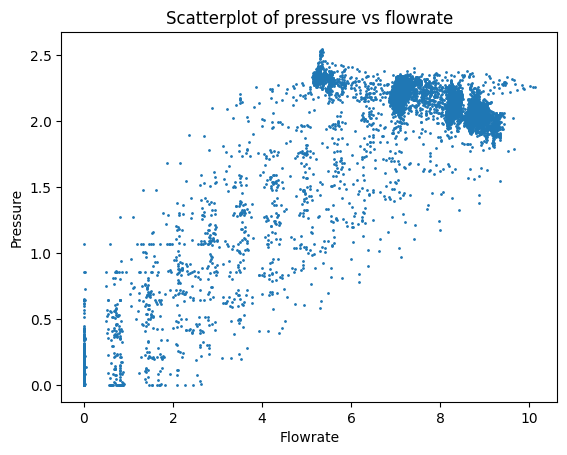

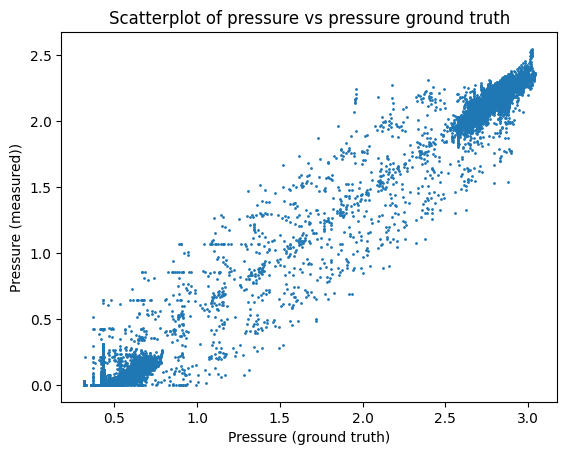

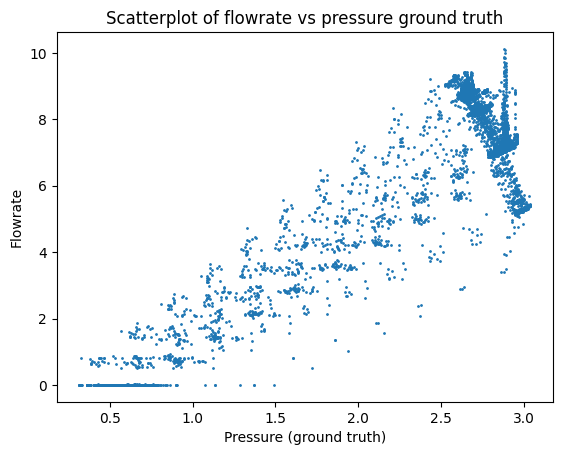

In [38]:
# plot scatterplot of pressure vs flowrate
plt.figure()
plt.scatter(Flowrate, Pressure, s=1)
plt.xlabel('Flowrate')
plt.ylabel('Pressure')
plt.title('Scatterplot of pressure vs flowrate')
plt.show()

# plot scatterplot of pressure vs pressure ground truth
plt.figure()
plt.scatter(Pressure_gt, Pressure, s=1)
plt.xlabel('Pressure (ground truth)')
plt.ylabel('Pressure (measured))')
plt.title('Scatterplot of pressure vs pressure ground truth')
plt.show()

# plot scatterplot of flowrate vs pressure ground truth
plt.figure()
plt.scatter(Pressure_gt, Flowrate, s=1)
plt.xlabel('Pressure (ground truth)')
plt.ylabel('Flowrate')
plt.title('Scatterplot of flowrate vs pressure ground truth')
plt.show()


In [4]:
import pandas as pd

# Create example dataframe
data = {'Time': ['2022-01-01 00:00:04', '2022-01-01 00:05:50', '2022-01-01 00:10:55'],
        'Value': [1, 2, 3]}
df = pd.DataFrame(data)

# Convert Time column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Set Time column as index
df = df.set_index('Time')

# Upsample from 5-minute to 1-minute interval
df_resampled = df.resample('1T').ffill()

print(df_resampled)

                     Value
Time                      
2022-01-01 00:00:00    NaN
2022-01-01 00:01:00    1.0
2022-01-01 00:02:00    1.0
2022-01-01 00:03:00    1.0
2022-01-01 00:04:00    1.0
2022-01-01 00:05:00    1.0
2022-01-01 00:06:00    2.0
2022-01-01 00:07:00    2.0
2022-01-01 00:08:00    2.0
2022-01-01 00:09:00    2.0
2022-01-01 00:10:00    2.0


In [2]:
import pandas as pd

# Read csv file
df = pd.read_excel('vib_with_current.xlsx')

# Convert Time column saved as dd:mm:yy hh:mm:ss to datetime
# df['created_at'] = pd.to_datetime(df['created_at'])

# Set Time column as index
df = df.set_index('created_at')

# Upsample from more than 1-minute to 1-minute interval
df_resampled = df.resample('1T').ffill()

# Write to csv file
df_resampled.to_excel('vib_with_current_resampled.xlsx')